# Model-based reinforcement learning
Ben Mann
<br>2017.09

### Motivation

Model-based learning 

- may be more introspectable than model-free learning. 
- is outperforming model-free learning at irreversible games (see [Sokoban imagination](https://arxiv.org/pdf/1707.06203.pdf)). It hasn't successfully been applied to Atari. 
- algorithms can be informed that part of the training space is untouchable (i.e. don’t simulate human minds being tortured, we can tell you ahead of time that is bad). 

### Summary of idea

DQN learns on CartPole much faster when input is [velocity, position, angle, angular velocity] vs pixels.

Can we use an unsupervised generative model to collapse a high dimensional state representation to speed up model-free learning? Evaluate on classic control problems and basic Atari games.

### Related work

[5] uses a deep VAE to learn a low-dimensional representation of classic control problems, but doesn't use reinforcement learning on top of it.

[7] and [9] build on Atari next video frame prediction [6] but fail to beat DQN performance.

[8] merges model-based and model-free techniques but doesn't report Atari success.

[2] uses the idea of combining model-based and model-free techniques for the purpose of data efficiency, but it doesn't operate on pixels, and in mujoco state + action should perfectly predict next state unlike atari where other agents can do stuff

  

So the big difference here is that we're aiming to beat DQN at data efficiency on Atari using an approximation of f(s, a) -&gt; s'. We start with CartPole to validate the approach and move on to Pong.

### Project Roadmap / ideas

1. [Cartpole](https://arxiv.org/pdf/1602.01783v1.pdf), [MountainCar](https://gym.openai.com/envs/MountainCar-v0), [Pendulum](https://gym.openai.com/envs/Pendulum-v0) 
    1. A2C on dense representation learns fast (upper bound of learning speed). Compare to 
        1. A2C trained on autoencoder-learned dense representation 
        2. A2C trained on pixels directly 

2. Pong 
    1. Is a dense representation learned from full-resolution color better than from downsample? 
        1. How much does model capacity matter as input resolution varies? 

    2. Can we learn faster than from pixels? 
    3. [This Stanford group failed to beat DQN](http://cs231n.stanford.edu/reports/2016/pdfs/116_Report.pdf) [9]. They say it's because compounding errors made long-term prediction hard, and pong and breakout have very long (>50) timestep dependencies. Seems like we could get around this by 
        1. predicting N steps ahead in one forward pass and
        2. feed all N steps into model a la I2A [8] so that later frames can be discarded dynamically.
    4. Can we do long-range, cheap rollouts using [dilated convolutions](http://www.inference.vc/dilated-convolutions-and-kronecker-factorisation/) [11]? Sokoban noted even 5-step rollouts were quite expensive 

3. Breakout(?) 
    1. Might be easier than pong due to denser rewards 

4. Montezuma (stretch goal) 
    1. Try adding noise to the input image, train an Inspector 
    2. Detect abnormally high variance in autoencoder's decoded output frame, use that as a signal to update model 
    3. Train new autoencoder per room, auto-detect when out of distribution a la "Modular Multitask Reinforcement Learning with Policy Sketches" [https://arxiv.org/abs/1611.01796v2](https://arxiv.org/abs/1611.01796v2) 
    4. Use an ensemble of autoencoders so that any of them can be swapped out or modified and agent still performs 

### Concrete steps

1. Run env (CartPole-v0, Pendulum, MountainCar) 
2. Generate training data for autoencoder model using pre-trained DQN / random agent interpolation to maximize search space 
3. Train autoencoder to repro -- a/b split here 
    1. a frame 
    2. Sequence of frames 

4. Use dense autoencoder representation to preprocess frames and train a model 
5. Compare to upper and lower bound baselines (A2C trained on "classic control" signals and A2C trained on pixels) 

### Additional questions

1. Does the learned autoencoder representation correlate with the real 4 dimensional cartpole observation? Chart r^2 for all combinations of variables. Chart scatter x vs y. 
2. For a random input state, what is the delta in the decoded representation given one action vs the other? If it's small, can we add a term to the loss to make it larger? 
3. How do loss and computational cost differ given different initial downsampling? Can we get away with preserving more detail? Does using 2 frame stack instead of 4 help? 
4. How quickly do imagination rollouts drift? How bad do they look? 
5. Would hard attention be an effective dimensionality reducer since most of the space is blank? 
6. How much better is VAE vs vanilla AE? 
  

### Literature review

1. Learning Multimodal Transition Dynamics for Model-Based Reinforcement Learning [https://arxiv.org/abs/1705.00470v2](https://arxiv.org/abs/1705.00470v2) 
2. Neural Network Dynamics for Model-Based Deep Reinforcement Learning with Model-Free Fine-Tuning [https://arxiv.org/abs/1708.02596v1](https://arxiv.org/abs/1708.02596v1) 
3. Neural Fitted Q Iteration - First Experiences with a Data Efficient Neural Reinforcement Learning Method [https://pdfs.semanticscholar.org/2820/01869bd502c7917db8b32b75593addfbbc68.pdf](https://pdfs.semanticscholar.org/2820/01869bd502c7917db8b32b75593addfbbc68.pdf) 
4. Deep Auto-Encoder Neural Networks in Reinforcement Learning [http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.172.1873&rep=rep1&type=pdf](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.172.1873&rep=rep1&type=pdf) 
5. Embed to Control: A Locally Linear Latent Dynamics Model for Control from Raw Images [http://papers.nips.cc/paper/5964-embed-to-control-a-locally-linear-latent-dynamics-model-for-control-from-raw-images.pdf](http://papers.nips.cc/paper/5964-embed-to-control-a-locally-linear-latent-dynamics-model-for-control-from-raw-images.pdf) 
6. A Deep Learning Approach for Joint Video Frame and Reward Prediction in Atari Games [https://arxiv.org/abs/1611.07078](https://arxiv.org/abs/1611.07078) 
7. Action-Conditional Video Prediction using Deep Networks in Atari Games [https://arxiv.org/abs/1507.08750](https://arxiv.org/abs/1507.08750) 
8. Imagination-Augmented Agents for Deep Reinforcement Learning [https://arxiv.org/abs/1707.06203](https://arxiv.org/abs/1707.06203) 
9. Model-Based Reinforcement Learning for Playing Atari Games [http://cs231n.stanford.edu/reports/2016/pdfs/116_Report.pdf](http://cs231n.stanford.edu/reports/2016/pdfs/116_Report.pdf) 
10. Learning model-based planning from scratch [https://arxiv.org/pdf/1708.02596v1.pdf](https://arxiv.org/pdf/1708.02596v1.pdf) 
11. Temporal Convolutional Policy Networks [https://bcourses.berkeley.edu/files/70257152/download](https://bcourses.berkeley.edu/files/70257152/download)

## Data collection
Originally we thought that to train a good environment model, we should start collecting data with a pre-trained agent, then gradually degrade that agent's performance to random by introducing more and more random actions instead of what the agent suggests. In a real world task, you can imagine using human demonstrations to generate the world model instead.

For Cartpole, it seems the state space is pretty well explored by completely random actions, so we never bothered.

In [1]:
import time
import numpy as np
import gym
from tqdm import tqdm_notebook
from skimage.transform import resize
%load_ext autoreload
%autoreload 2

env = gym.make('CartPole-v0')

start


[2017-09-20 12:24:57,524] Making new env: CartPole-v0


In [2]:
def downsample(im):
    return np.uint8(resize(np.mean(im, axis=-1), (im.shape[0]/4,im.shape[1]/4), mode='edge'))

print(env.action_space, env.observation_space, env.observation_space.high.shape)
frames, rewards, actions, observations = [], [], [], []
n_frames = 0
# CartPole ends at 200, but useful for other envs?
MAX_FRAMES_PER_EPISODE = 1000
# ~2GB of data for CartPole
FRAMES_TO_COLLECT = 66000

t = time.time()
with tqdm_notebook(total=FRAMES_TO_COLLECT) as pbar:
    while n_frames < FRAMES_TO_COLLECT:
        observation = env.reset()
        fs = []
        rs = []
        as_ = []
        os = []
        for _ in range(MAX_FRAMES_PER_EPISODE):
            fs.append(downsample(env.render(mode = 'rgb_array')))
            action = env.action_space.sample()
            observation, reward, done, _ = env.step(action)
            as_.append(action)
            rs.append(reward)
            os.append(observation)
            n_frames += 1
            if done:
                frames.append(fs)
                rewards.append(rs)
                actions.append(as_)
                observations.append(os)
                pbar.update(len(fs))
                break

Discrete(2) Box(4,) (4,)


HBox(children=(IntProgress(value=0, max=66000), HTML(value='')))

In [3]:
# Save the data
env_name = 'cartpole'
np.save('%s_frames' % env_name, frames)
np.save('%s_rewards' % env_name, rewards)
np.save('%s_observations' % env_name, observations)
np.save('%s_actions' % env_name, actions)

## Sanity check the data

Shape of stacked frames (66001, 100, 150)
Range of values 0 to 255
Bounding box (43, 78, 36, 110)


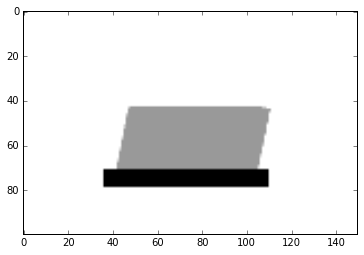

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

all_frames = np.vstack(np.stack(x) for x in frames)
print('Shape of stacked frames', all_frames.shape)
combined = np.min(all_frames, axis=0)
plt.imshow(combined, cmap='gray', vmin=0, vmax=255)
print('Range of values', np.min(combined), 'to', np.max(combined))
def bbox(img):
    '''Returns y_min, y_max, x_min, x_max
    
    https://stackoverflow.com/a/31402351/614529
    '''
    a = np.where(img != 255)
    bounds = np.min(a[0]), np.max(a[0]), np.min(a[1]), np.max(a[1])
    return bounds
# This would be useful if we wanted to reduce input dimensionality 
# by cropping away the extra whitespace.
print('Bounding box', bbox(combined))

## Build the environment model
Next, we use this collected data to train an autoencoder that takes a stack of frames and actions as inputs and outputs the next frame. This architecture requires no domain-specific information, though for games like Atari the framestack needs to be 4 frames deep to still pick up dynamics despite flickering.

For a simple autoencoder we started with https://blog.keras.io/building-autoencoders-in-keras.html and modified it to our purposes. Key things to note:
1. Dimensions matter! When scaling down and back up again, if the input dimensions don't evenly divide by the max pool layers or stride, when you scale back up, the dimensions won't match. E.g., 20//3 = 6, 6 * 3 = 18, 18 != 20. Two ways to get around this are
  1. Scale your inputs to a number that's properly divisible (expensive)
  1. Crop your inputs to a divisible number
  1. Pad your inputs to get to a divisible number (best, since it doesn't require any domain knowledge)
1. Convolutions don't work on framestacks, so we use a TimeDistributed layer wrapper to get around that. After everything gets flattened and fed into the dense layers, there's a chance for the environment dynamics to be processed. We could have put the frame stacks in the channel dimension but this seemed like a more general solution in case we wanted to use colors for some other environment.
1. Initially we just concatenated the action (0 or 1 in CartPole) with the input to the bottleneck layer, but this didn't give the network enough flexibility to condition the outputs appropriately, nor would it scale to different number of actions. Instead, we one-hot encode the actions per standard practice and put a few Dense layers in front of them. We also tried tiling the actions per Deepmind's I2A, but it seemed like a waste of computation and had worse performance.
1. The data is big enough that we have to get it in batches using `fit_generator`, else even my 64GB RAM machine OOM's.
  

In [5]:
# See autoencoder.py for the meat here.
from autoencoder import load_data, make_model, train
_, windowed_frames, windowed_frames_next, windowed_actions = load_data(window=3)

Using TensorFlow backend.


In [6]:
model = make_model(windowed_frames)
train(model, windowed_frames, windowed_frames_next, windowed_actions)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 3, 96, 144, 1) 0                                            
____________________________________________________________________________________________________
time_distributed_1 (TimeDistribu (None, 3, 96, 144, 16 160         input_1[0][0]                    
____________________________________________________________________________________________________
time_distributed_2 (TimeDistribu (None, 3, 48, 72, 16) 0           time_distributed_1[0][0]         
____________________________________________________________________________________________________
time_distributed_3 (TimeDistribu (None, 3, 48, 72, 16) 2320        time_distributed_2[0][0]         
___________________________________________________________________________________________

In [7]:
# Load the model from disk in case we want to start from here without training.
from keras.models import load_model, Model
model = load_model('autoencoder.h5')
encoder_model = Model(model.input, model.get_layer('bottleneck').output, name='encoder')
print(model.input_shape, model.output_shape, encoder_model.output_shape)

[(None, 3, 96, 144, 1), (None, 2)] (None, 1, 96, 144, 1) (None, 4)


## Model exploration
Let's verify that the model picked up the properties we expect.
1. For a random input state, what is the delta in the decoded representation given one action vs the other? If it's small, can we add a term to the loss to make it larger?
1. Does the learned autoencoder representation correlate with the real 4 dimensional cartpole observation? Chart r2 for all combinations of variables. Chart scatter x vs y.
1. How quickly do imagination rollouts drift? How bad do they look?

When I initially ran this data exploration, the scatter chart looked pretty bad and the imagination rollouts were nearly the same regardless of the input actions. After a lot of experimentation, it got much better.


In [8]:
WINDOW = 3
def one_hot(x, n_classes):
    size = x.shape[0]
    one_hot = np.zeros((size, n_classes))
    one_hot[range(size), x] = 1
    return one_hot

one_hot_actions = one_hot(windowed_actions, 2)
print(one_hot_actions.shape)

(57205, 2)


### Left vs right encoded representation
First let's see if the encoded representation looks at all similar to the actual CartPole data (position, velocity, angle, angular velocity). You can see the teal line on the left roughly tracks the green line on the right. Similarly, the teal line on the right roughly tracks the red line on the left. The delta between the two charts on the right is hard to see, so take a look at the bottom left chart. Values range between 0 and .6, which seems reasonable given the SELU nonlinearity.

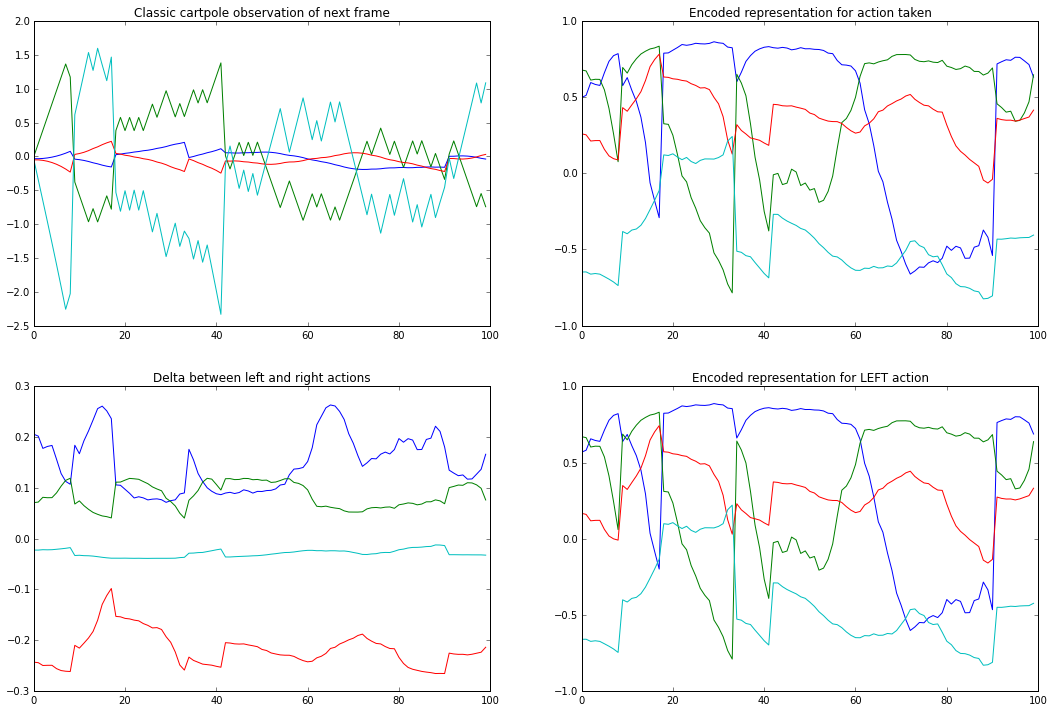

In [9]:
N_FRAMES = 100
from autoencoder import preprocess, eps_to_stacked_window

windowed_observations = eps_to_stacked_window(observations, window=WINDOW, offset=True)
left_pred = encoder_model.predict([preprocess(windowed_frames[:N_FRAMES]), one_hot(np.zeros(N_FRAMES, dtype=np.uint8), 2)])
right_pred = encoder_model.predict([preprocess(windowed_frames[:N_FRAMES]), one_hot(np.ones(N_FRAMES, dtype=np.uint8), 2)])
pred = encoder_model.predict([preprocess(windowed_frames[:N_FRAMES]), one_hot_actions[:N_FRAMES]])

plt.figure(figsize=(18, 12))
plt.subplot(2,2,1)
plt.title('Classic cartpole observation of next frame')
plt.plot(windowed_observations[:N_FRAMES, WINDOW-1, :])
plt.subplot(2,2,2)
plt.title('Encoded representation for action taken')
plt.plot(pred)
plt.subplot(2,2,4)
plt.plot(left_pred)
plt.title('Encoded representation for LEFT action')
plt.subplot(2,2,3)
plt.title('Delta between left and right actions')
plt.plot(left_pred - right_pred)
plt.show()

### Correlation with actual CartPole dynamics
Next, we hope that at least one of the encoded channels picked up each of the real variables, even though it doesn't know anything about them. What we're looking for is a correlation coefficient close to 1 or -1 in every row. We can see that the position row has 0.99, the angle row has .93, the velocity row has .73, and the angular velocity row has .77. So the encoder had a harder time learning the dynamic channels than the static ones.

/home/ben/miniconda3/lib/python3.6/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


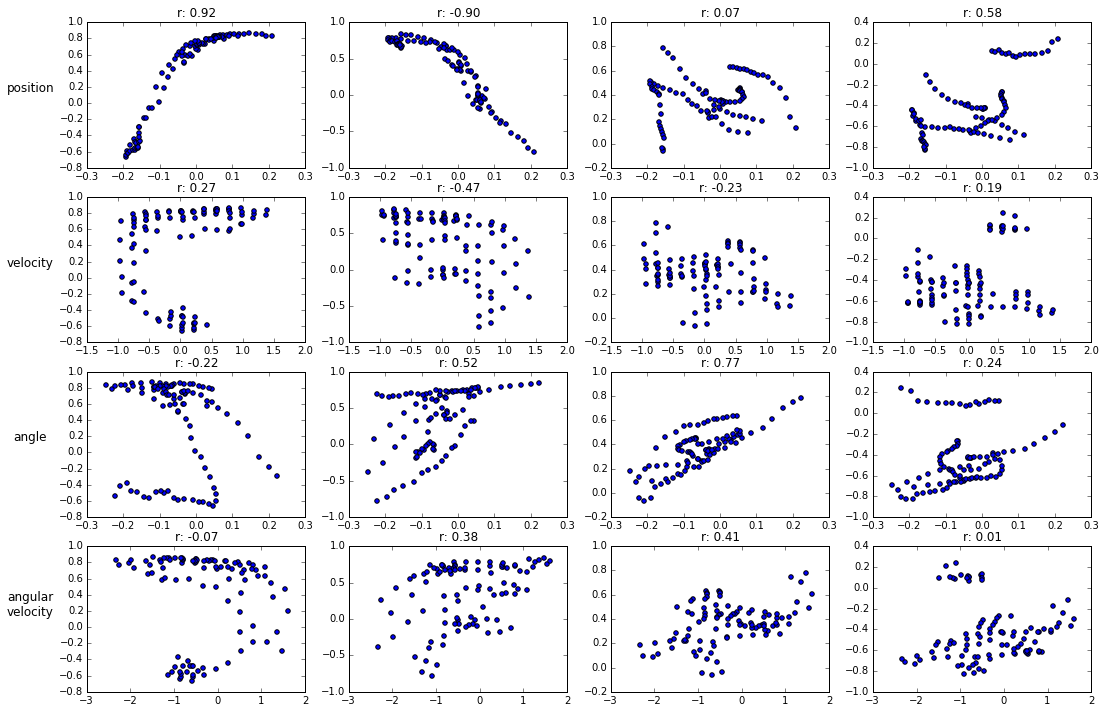

In [10]:
plt.figure(figsize=(18, 12))
row_labels = ['position', 'velocity', 'angle', 'angular\nvelocity']
for i in range(4):
    for j in range(4):
        ax = plt.subplot(4,4,i * 4 + j + 1)
        x,y = windowed_observations[:N_FRAMES, WINDOW-1, i], pred[:N_FRAMES, j]
        if j == 0:
            ax.set_ylabel(row_labels[i], rotation=0, labelpad=30, size='large')
        plt.title('r: %.2f' % np.corrcoef(x,y)[0,1])
        plt.scatter(x,y)

### Imagination
Our model takes a stack of frames and an action and outputs the predicted next frame. An imagination rollout takes an initial condition and feeds the model with its own predictions for N steps (15 in this case). 

We're looking for the cart to move left when we give it a stream of left actions, and right when we give it a stream of right actions. When I first ran this, it moved left no matter what actions it was given. You can see that one moves slower because initially the pole was tipping the other way. Seems reasonable!

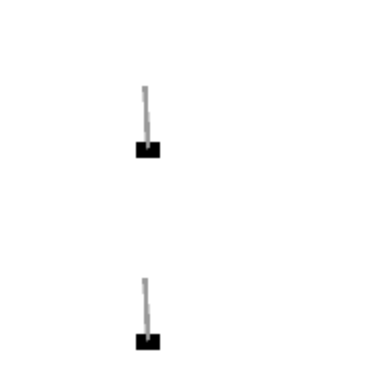

In [11]:
from array2gif import write_gif
from IPython.display import Image

def unprocess(frames):
    '''Invert, scale, remove extra dims'''
    return (1 - np.squeeze(frames)) * 255

def to_rgb(im, scale=None):
    '''Convert a grayscale image into the format array2gif expects.'''
    if scale:
        im = np.stack(resize(x, (im.shape[1] * scale, im.shape[2] * scale), mode='edge') for x in im)
    return [np.stack((x,) * 3).astype(np.uint8) for x in im]
        
def rollout(action):
    frames = list(preprocess(windowed_frames[0]))
    # How many steps to rollout
    N_STEPS = 15
    for _ in range(N_STEPS):
        x = np.expand_dims(np.array(frames[-WINDOW:]), axis=0)
        pred = model.predict([x, np.array(action)])
        # Put the extra dimension on the end
        frames.append(np.expand_dims(np.squeeze(pred), axis=-1))
    return np.array(frames)

def display(frames, name):
    write_gif(to_rgb(frames, scale=2), filename=name, fps=20)
    return Image(filename=name)

left = rollout([[0,1]])
right = rollout([[1,0]])
display(unprocess(np.concatenate([left, right], axis=1)), 'test.gif')

## A2C

In [1]:
# Must restart kernel for this to not OOM. 
# Apparently there's no other way to release GPU resources :(
%env OPENAI_LOGDIR=/tmp/logs
# Baseline CartPole
!python run_cartpole.py --policy=fc --nstack=1

env: OPENAI_LOGDIR=/tmp/logs
Using TensorFlow backend.
[2017-09-20 15:01:43,401] Making new env: CartPole-v0
[2017-09-20 15:01:43,405] Making new env: CartPole-v0
[2017-09-20 15:01:43,410] Making new env: CartPole-v0
[2017-09-20 15:01:43,414] Making new env: CartPole-v0
[2017-09-20 15:01:43,419] Making new env: CartPole-v0
[2017-09-20 15:01:43,424] Making new env: CartPole-v0
[2017-09-20 15:01:43,428] Making new env: CartPole-v0
2017-09-20 15:01:43.433369: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2017-09-20 15:01:43.433409: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2017-09-20 15:01:43.433420: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled 

In [ ]:
# Use only position and angle to solve
!python run_cartpole.py --policy=fc --nstack=2 --nsteps=20 --use_static_wrapper

Using TensorFlow backend.
[2017-09-20 15:02:29,726] Making new env: CartPole-v0
[2017-09-20 15:02:29,732] Making new env: CartPole-v0
[2017-09-20 15:02:29,737] Making new env: CartPole-v0
[2017-09-20 15:02:29,741] Making new env: CartPole-v0
[2017-09-20 15:02:29,745] Making new env: CartPole-v0
[2017-09-20 15:02:29,750] Making new env: CartPole-v0
[2017-09-20 15:02:29,755] Making new env: CartPole-v0
2017-09-20 15:02:29.760442: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2017-09-20 15:02:29.760485: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2017-09-20 15:02:29.760498: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but 

In [ ]:
# Solve from pixels
!python run_cartpole.py --policy=cnn --nstack=2 --nsteps=20

Using TensorFlow backend.
[2017-09-20 17:35:35,965] Making new env: CartPole-v0
[2017-09-20 17:35:35,969] Making new env: CartPole-v0
[2017-09-20 17:35:35,975] Making new env: CartPole-v0
[2017-09-20 17:35:35,981] Making new env: CartPole-v0
[2017-09-20 17:35:35,987] Making new env: CartPole-v0
[2017-09-20 17:35:35,993] Making new env: CartPole-v0
[2017-09-20 17:35:35,999] Making new env: CartPole-v0
2017-09-20 17:35:36.005675: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2017-09-20 17:35:36.005709: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2017-09-20 17:35:36.005716: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but 

In [ ]:
# Use imagination to solve from pixels
!python run_cartpole.py --policy=fc --nstack=2 --nsteps=20 --use_encoded_imagination

Using TensorFlow backend.
[2017-09-21 10:31:48,717] Making new env: CartPole-v0
[2017-09-21 10:31:48,723] Making new env: CartPole-v0
2017-09-21 10:31:48.729727: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2017-09-21 10:31:48.729776: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2017-09-21 10:31:48.729782: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2017-09-21 10:31:48.729793: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX2 instructions, but these are available on your machine and could sp

2017-09-21 10:31:48.782346: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2017-09-21 10:31:48.782385: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2017-09-21 10:31:48.782390: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2017-09-21 10:31:48.782394: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX2 instructions, but these are available on your machine and could speed up CPU computations.
2017-09-21 10:31:48.782399: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't

2017-09-21 10:31:53.279318: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:893] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2017-09-21 10:31:53.279650: I tensorflow/core/common_runtime/gpu/gpu_device.cc:940] Found device 0 with properties: 
name: GeForce GTX 1080 Ti
major: 6 minor: 1 memoryClockRate (GHz) 1.582
pciBusID 0000:24:00.0
Total memory: 10.91GiB
Free memory: 2.13GiB
2017-09-21 10:31:53.279666: I tensorflow/core/common_runtime/gpu/gpu_device.cc:961] DMA: 0 
2017-09-21 10:31:53.279672: I tensorflow/core/common_runtime/gpu/gpu_device.cc:971] 0:   Y 
2017-09-21 10:31:53.279680: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1030] Creating TensorFlow device (/gpu:0) -> (device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:24:00.0)


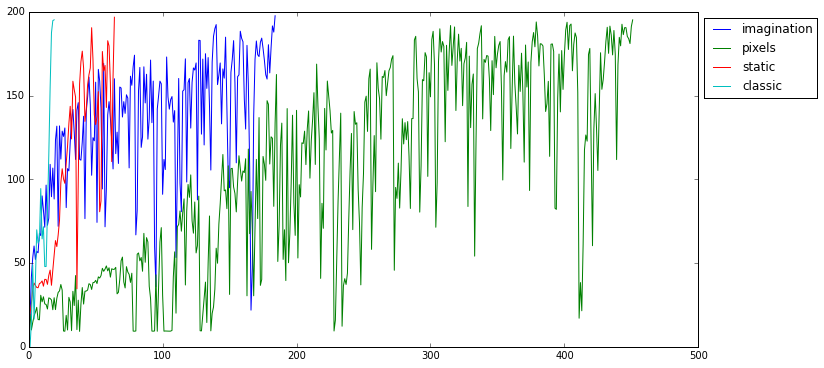

In [32]:
# Render learning graphs
import glob
import tensorflow as tf

files = sorted(glob.glob('/tmp/logs/tb/**/events*', recursive=True), reverse=True)

def read_tensorboard(path_to_events_file, tag):
    """This example supposes that the events file contains summaries with a
    summary value tag.  These could have been added by calling
    `add_summary()`, passing the output of a scalar summary op created with
    with: `tf.scalar_summary(['loss'], loss_tensor)`.
    """
    for e in tf.train.summary_iterator(path_to_events_file):
        for v in e.summary.value:
            if v.tag == tag:
                yield v.simple_value

import matplotlib.pyplot as plt
%matplotlib inline

labels = ['classic', 'static', 'pixels', 'imagination']

plt.figure(figsize=(12, 6))
plt.hold(True)
for i in range(min(len(files), 6)):
    data = list(read_tensorboard(files[i], 'mean_episode_length'))
    if data[-1] < 195:
        continue
    plt.plot(data, label=labels.pop())
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()